# <span style="color:orange">30/05 - Pair Regresión 4- Alicia y Lidia</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import sidetable
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('anime_codi.csv', index_col=0)
df

,title,episodes,members,popularity,ranked,score
0,4175,25.0,2389,141,25.0,8.82
1,11065,22.0,2389,28,24.0,8.83
2,7324,13.0,2389,98,23.0,8.83
3,3331,2.0,2389,4,1.0,6.41
4,6414,1.0,2389,502,22.0,8.83
...,...,...,...,...,...,...
19306,3232,13.0,2389,843,1070.0,7.73
19307,3363,2.0,2389,1292,1071.0,7.73
19308,3486,19.0,2389,1314,1073.0,7.73
19309,5264,1.0,2389,1469,1077.0,7.73


**Mostramos el último r2 y vamos a intentar mejorarlo.**

Para el conjunto train:
- El valor de r2 score es  0.7148612182371572
- El valor de r2 score adjusted es  0.7147489058132708
- El MAE es 0.35730737631651216
- EL RMSE es  0.5410147146935439

Para el conjunto test:
- El valor de r2 score es  0.7180710292673285
- El valor de r2 score adjusted es  0.7176262060254025
- El MAE es 0.3491967702532211
- EL RMSE es  0.5329842793318814

### 1. Tomando los datos del mejor modelo obtenido en la clase de la pair de ayer.
- Investiga la multicolinealidad de las variables independientes.
- Selecciona aquellas variables que tengan una colinealidad dentro de los margenes estandar. Mostrando como se han ido eliminando las variables y como han cambiado los resultados del VIF.
- Realiza un modelo de regresión lineal multiple para ver si se han mejorado los resultados obtenidos.
- Estudia si tus resultados son acordes a las asunciones de linealidad.

In [3]:
df.dtypes

title           int64
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
dtype: object

**Vamos a estandarizar nuestro DF para calcular mejor el VIF**

In [4]:
df_estandarizar = df.drop(["title"], axis=1)

In [5]:
st = StandardScaler()
df_std = pd.DataFrame(st.fit_transform(df_estandarizar), columns=df_estandarizar.columns)
df_std.head()

,episodes,members,popularity,ranked,score
0,2.627156,-0.268042,-1.533121,-1.552882,2.293160
1,2.220516,-0.268042,-1.555819,-1.553111,2.303049
2,1.000595,-0.268042,-1.541758,-1.553339,2.303049
3,-0.490419,-0.268042,-1.560640,-1.558370,-0.089901
4,-0.625966,-0.268042,-1.460609,-1.553568,2.303049


In [6]:
columnas = df_std.columns
df[columnas] = df_std
df.head()

,title,episodes,members,popularity,ranked,score
0,4175,2.627156,-0.268042,-1.533121,-1.552882,2.293160
1,11065,2.220516,-0.268042,-1.555819,-1.553111,2.303049
2,7324,1.000595,-0.268042,-1.541758,-1.553339,2.303049
3,3331,-0.490419,-0.268042,-1.560640,-1.558370,-0.089901
4,6414,-0.625966,-0.268042,-1.460609,-1.553568,2.303049


In [7]:
df.dtypes

title           int64
episodes      float64
members       float64
popularity    float64
ranked        float64
score         float64
dtype: object

**Observamos que tenemos valores nulos pero no es un alto porcentaje asi que pasaremos a eliminarlos porque se han creado debido a la estandarización**

In [8]:
df.stb.missing()

,missing,total,percent
episodes,2588,15875,16.302362
members,2588,15875,16.302362
popularity,2588,15875,16.302362
ranked,2588,15875,16.302362
score,2588,15875,16.302362
title,0,15875,0.000000


In [9]:
df = df.dropna()

In [10]:
df.stb.missing()

,missing,total,percent
title,0,13287,0.0
episodes,0,13287,0.0
members,0,13287,0.0
popularity,0,13287,0.0
ranked,0,13287,0.0
score,0,13287,0.0


In [11]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [12]:
get_VIF(df,'score')

popularity    4.550152
const         4.032565
ranked        3.953135
members       1.321470
episodes      1.121195
title         1.005480
dtype: float64

**Observamos que no tenemos ninguna relación severa en nuestras variables, pero podemos probar con la de mayor valor ('popularity') que pasaría si la eliminamos.**

In [13]:
df_copia = df.copy()

In [14]:
del df_copia['popularity']

In [15]:
x=df_copia.drop(columns = ['score'])
y = df_copia['score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresiónn lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.6961113648814656
El valor de r2 score adjusted es  0.6959969489796891
El MAE es 0.38121408978725896
EL RMSE es  0.5638935396741745
Para el conjunto test:---------------
El valor de r2 score es  0.656641055359908
El valor de r2 score adjusted es  0.656123363773568
El MAE es 0.4033230358484902
EL RMSE es  0.607564800248876


**Vemos que ha empeorado el modelo quitando la vairable popularity, por lo que decidimos no quitarla y seguir con el modelo con todas las variables.**

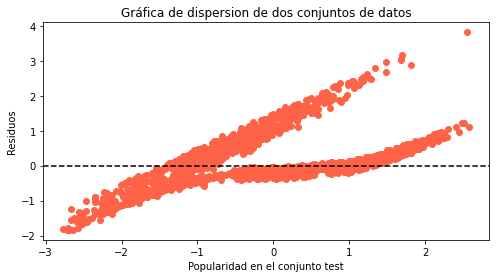

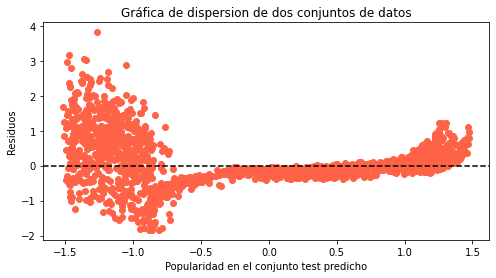

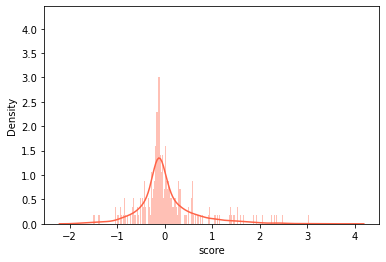

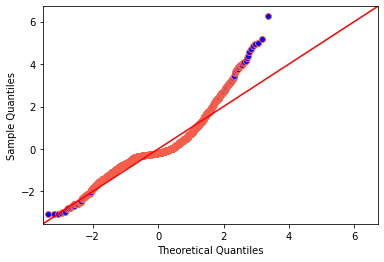

In [16]:
x=df.drop(columns = ['score'])
y = df['score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Creamos la regresiónn lineal
LR = LinearRegression()
# Ajustamos el modelo
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)


residuals = (y_test - y_prediction)


# Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals, color='tomato')
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad en el conjunto test')
ax.set_ylabel('Residuos')
plt.show()


# Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_prediction , y=residuals, color='tomato')
plt.axline((float(min(y_prediction)),0),(float(max(y_prediction)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Popularidad en el conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

# Normalidad
fig = plt.figure()
sns.distplot(residuals,bins = len(residuals), color='tomato')
plt.show()
sm.qqplot(residuals, line = '45', fit = True, color='tomato')
py.show()

**Hemos vuelto a utilizar nuestro primer modelo que era el mejor y en comparación con las anteriores gráficas de los demás pairs vemos en estas que: tenemos más independencia de nuestros datos porque están más dispersos, aunque son algo menos homogéneos pero no llegan a ser heterogéneos y tienen una distribución normal que vemos en las dos últimas gráficas.**

### 2. Toma ahora el dataset del mejor modelo obtenido y aplica los siguentes modelos de regresión con regularización.
- Ridge
- Lasso.


In [17]:
#Ridge
x = df.drop(columns = ['score'])
y = df['score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
LR = Ridge(normalize= True)
LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)
y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es' ,Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))
print('\n')
print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:
El valor de r2 score es  0.5780313994699837
El valor de r2 score adjusted es 0.57783278862534
El MAE es 0.5060086389154138
EL RMSE es  0.6644770069257098


Para el conjunto test:
El valor de r2 score es  0.5582605994147183
El valor de r2 score adjusted es  0.5574277574075817
El MAE es 0.522574853829625
EL RMSE es  0.6891305303664718


In [18]:
#Lasso
x = df.drop(columns = ['score'])
y = df['score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

LR = Lasso(normalize= True) 

LR.fit(x_train,y_train)
y_prediction_train =  LR.predict(x_train)
Adj_r2_train = 1 - (1-r2_score(y_train,y_prediction_train)) * (x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

y_prediction =  LR.predict(x_test)
Adj_r2_test = 1 - (1-r2_score(y_test, y_prediction)) * (x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)

print('Para el conjunto train:')
print('El valor de r2 score es ',r2_score(y_train,y_prediction_train))
print('El valor de r2 score adjusted es ',Adj_r2_train)
print('El MAE es',mean_absolute_error(y_train,y_prediction_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_prediction_train)))
print('\n')
print('Para el conjunto test:')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El valor de r2 score adjusted es ',Adj_r2_test)
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:
El valor de r2 score es  0.0
El valor de r2 score adjusted es  -0.0004706768332862765
El MAE es 0.8161354215552107
EL RMSE es  1.0229158070410562


Para el conjunto test:
El valor de r2 score es  -1.3320061029720165e-06
El valor de r2 score adjusted es  -0.0018867040498551368
El MAE es 0.8311451232617421
EL RMSE es  1.0368566352868964


**Estos métodos incluyen un factor de penalización en función de la cantidad de regresores innecesarios. Podemos observar que hemos obtenido peores resultados (sobre todo con Lasso) y esto se debe a que ya habiamos tomado las mejores vairable posibles para la obtención de este modelo y al aplicar la penalización se intentan eliminar variables adicionales que empeoran las predicciones obtenidas.**